# Keras CNN Train Test Study
----
Glenn Abastillas

This notebook provides an example of training a CNN to identify images.

In [20]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, Conv3D, MaxPool3D
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
import numpy as np

import random

import matplotlib.pyplot as plt

#### Data Exploration

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Plot all images.

Text(0.5, 0.98, 'Random Selection of Fashion Items')

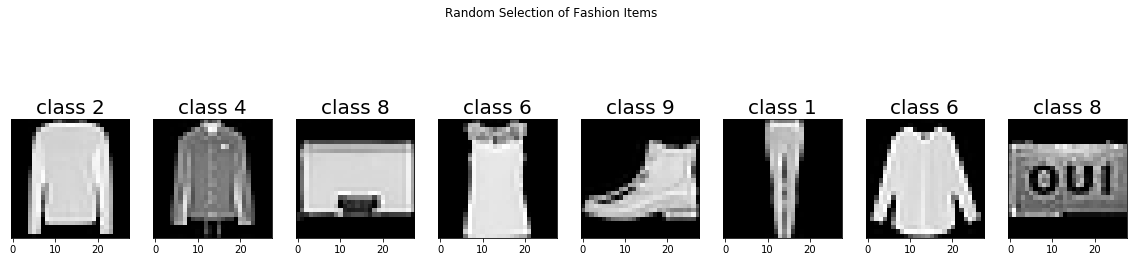

In [3]:
fig, axes = plt.subplots(1, 8, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    current = random.randint(0, x_train.shape[0])
    ax.imshow(x_train[current], cmap='gray')
    ax.set_title(f'class {y_train[current]}', fontdict={'fontsize': 20})
    ax.set_yticks([])

fig.suptitle("Random Selection of Fashion Items")

In [4]:
x_train = x_train.reshape(x_train.shape[0], 1, *x_train.shape[1:])
x_test = x_test.reshape(x_test.shape[0], 1, *x_test.shape[1:])

#### Define Model

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
help(Conv2D); Conv2D()

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(_Conv)
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`.
 |  
 |  # Arguments
 |      filters: Integer, the dimensionality of the output space
 |          (i.e. the number of output filters in the convolution).
 |      kernel_size: An integer or tuple/list of 2 integers, specifying the
 |          height and width of the 2D convolution window.
 |        

In [17]:
layers = [
    Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28)),
    Conv2D(32, 3, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28))`
  
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
model = Sequential()
model.add(Conv3D(32, (3, 3), activation='relu', input_shape=(1, 28, 28)))

ValueError: The `kernel_size` argument must be a tuple of 3 integers. Received: (3, 3)

In [18]:
model = Sequential(layers=layers)

ValueError: Input 0 is incompatible with layer conv2d_10: expected ndim=4, found ndim=3

In [ ]:
kj